# Lec 22 Homework

Choose a dataset from UC Irvine Machine Learning Repository! and apply the Kneighbour algorithm to do classification.

The Nearest Neighbors method is a classification algorithm. The concept is that if two points have close distance, they are more likely to belong to the same class.

In [1]:
from sklearn.neighbors import KNeighborsClassifier

#We need to change the number of neighbors and compare
estimator1 = KNeighborsClassifier() #default = 5
estimator2 = KNeighborsClassifier(2)
estimator3 = KNeighborsClassifier(7)
estimator4 = KNeighborsClassifier(10)

We have to:

1. fit: use training data to build the ML model
    -input: training data set
    -return: ML model with trained parameters

2. predict: use test data to validate ML model
    -input: test data set
    -return: the predicted ML values

In [2]:
#We need to create our dataset
import numpy as np
from sklearn.datasets import load_digits

dataset = load_digits()
X = dataset.data
Y = dataset.target

In [3]:
#We need to split the data into training and testing values
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [4]:
len(X_train)

1347

In [5]:
len(X_test)

450

In [6]:
#Now we need to fit the data to build ML model with trained parameters

estimator1.fit(X_train, Y_train)
estimator2.fit(X_train, Y_train)
estimator3.fit(X_train, Y_train)
estimator4.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [7]:
#Now we are at thepredict stage where we validate our model
#and check the accuracy

Y_predicted1 = estimator1.predict(X_test)
accuracy1 = np.mean(Y_test==Y_predicted1)*100
print("The accuracy with 5 neighbors is {0:.1f}%".format(accuracy1))

Y_predicted2 = estimator2.predict(X_test)
accuracy2 = np.mean(Y_test==Y_predicted2)*100
print("The accuracy with 2 neighbors is {0:.1f}%".format(accuracy2))

Y_predicted3 = estimator3.predict(X_test)
accuracy3 = np.mean(Y_test==Y_predicted3)*100
print("The accuracy with 7 neighbors is {0:.1f}%".format(accuracy3))

Y_predicted4 = estimator4.predict(X_test)
accuracy4 = np.mean(Y_test==Y_predicted4)*100
print("The accuracy with 10 neighbors is {0:.1f}%".format(accuracy4))

The accuracy with 5 neighbors is 99.1%
The accuracy with 2 neighbors is 99.1%
The accuracy with 7 neighbors is 99.1%
The accuracy with 10 neighbors is 98.7%


We can see that the highest accuracy is with 7 neighbors.
Overall this algorithm produces highly accurate results.

In [8]:
#Now we will use cross validation method for accuracy
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(estimator1, X, Y, scoring='accuracy')
average_accuracy1 = np.mean(scores1)*100
print("The accuracy with 5 neighbors is {0:.1f}%".format(average_accuracy1))

scores2 = cross_val_score(estimator2, X, Y, scoring='accuracy')
average_accuracy2 = np.mean(scores2)*100
print("The accuracy with 2 neighbors is {0:.1f}%".format(average_accuracy2))

scores3 = cross_val_score(estimator3, X, Y, scoring='accuracy')
average_accuracy3 = np.mean(scores3)*100
print("The accuracy with 7 neighbors is {0:.1f}%".format(average_accuracy3))

scores4 = cross_val_score(estimator4, X, Y, scoring='accuracy')
average_accuracy4 = np.mean(scores4)*100
print("The accuracy with 10 neighbors is {0:.1f}%".format(average_accuracy4))

The accuracy with 5 neighbors is 96.3%
The accuracy with 2 neighbors is 96.7%
The accuracy with 7 neighbors is 96.0%
The accuracy with 10 neighbors is 95.5%


Using this cross-validation method we see that 2 neighbors has the highest accuracy.

In [9]:
import warnings
warnings.filterwarnings('ignore')

parameters = list(range(1,20))

avg_scores1 = []
all_scores1 = []

for n_neighbors in parameters:
    estimator1 = KNeighborsClassifier()
    scores1 = cross_val_score(estimator1, X, Y, scoring='accuracy')
    avg_scores1.append(np.mean(scores1))
    all_scores1.append(scores1)
    
avg_scores2 = []
all_scores2 = []

for n_neighbors in parameters:
    estimator2 = KNeighborsClassifier(2)
    scores2 = cross_val_score(estimator2, X, Y, scoring='accuracy')
    avg_scores2.append(np.mean(scores2))
    all_scores2.append(scores2)
    
avg_scores3 = []
all_scores3 = []

for n_neighbors in parameters:
    estimator3 = KNeighborsClassifier(7)
    scores3 = cross_val_score(estimator3, X, Y, scoring='accuracy')
    avg_scores3.append(np.mean(scores3))
    all_scores3.append(scores3)
    
avg_scores4 = []
all_scores4 = []

for n_neighbors in parameters:
    estimator4 = KNeighborsClassifier(10)
    scores4 = cross_val_score(estimator4, X, Y, scoring='accuracy')
    avg_scores4.append(np.mean(scores4))
    all_scores4.append(scores4)

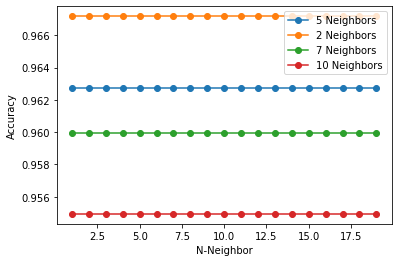

In [10]:
import matplotlib.pyplot as plt

plt.plot(parameters,avg_scores1, '-o', label='5 Neighbors')
plt.plot(parameters,avg_scores2, '-o', label='2 Neighbors')
plt.plot(parameters,avg_scores3, '-o', label='7 Neighbors')
plt.plot(parameters,avg_scores4, '-o', label='10 Neighbors')
plt.xlabel('N-Neighbor')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now let's compare with a couple other scikit classifiers found here:

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [11]:
from sklearn.tree import DecisionTreeClassifier

estimator5 = DecisionTreeClassifier(max_depth=10) #max_depth=5
estimator5.fit(X_train, Y_train)
Y5_predicted = estimator5.predict(X_test)
accuracy5 = np.mean(Y_test==Y5_predicted)*100
print('The accuracy using Decision Tree Classifier is {0:1f}%'.format(accuracy5))
print('With max depth = 10')

The accuracy using Decision Tree Classifier is 87.333333%
With max depth = 10


In [12]:
estimator5 = DecisionTreeClassifier(max_depth=20) #max_depth=5
estimator5.fit(X_train, Y_train)
Y5_predicted = estimator5.predict(X_test)
accuracy5 = np.mean(Y_test==Y5_predicted)*100
print('The accuracy using Decision Tree Classifier is {0:1f}%'.format(accuracy5))
print('With max depth = 20')

The accuracy using Decision Tree Classifier is 87.555556%
With max depth = 20


In [13]:
estimator5 = DecisionTreeClassifier(max_depth=100) #max_depth=5
estimator5.fit(X_train, Y_train)
Y5_predicted = estimator5.predict(X_test)
accuracy5 = np.mean(Y_test==Y5_predicted)*100
print('The accuracy using Decision Tree Classifier is {0:1f}%'.format(accuracy5))
print('With max depth = 100')

The accuracy using Decision Tree Classifier is 86.888889%
With max depth = 100


We can see when playing around with the parameters for the Decision Tree Classifier that the we can't really get above 87% accuracy.

In [14]:
from sklearn.neural_network import MLPClassifier

estimator6 = MLPClassifier(max_iter=1000)
estimator6.fit(X_train, Y_train)
Y6_predicted = estimator6.predict(X_test)
accuracy6 = np.mean(Y_test==Y6_predicted)*100
print('The accuracy using MLP Classifier is {0:1f}%'.format(accuracy6))
print('With max iterations = 1000')

The accuracy using MLP Classifier is 97.555556%
With max iterations = 1000


In [15]:
estimator6 = MLPClassifier(max_iter=20)
estimator6.fit(X_train, Y_train)
Y6_predicted = estimator6.predict(X_test)
accuracy6 = np.mean(Y_test==Y6_predicted)*100
print('The accuracy using MLP Classifier is {0:1f}%'.format(accuracy6))
print('With max iterations = 20')

The accuracy using MLP Classifier is 93.555556%
With max iterations = 20


In [16]:
estimator6 = MLPClassifier(max_iter=10000)
estimator6.fit(X_train, Y_train)
Y6_predicted = estimator6.predict(X_test)
accuracy6 = np.mean(Y_test==Y6_predicted)*100
print('The accuracy using MLP Classifier is {0:1f}%'.format(accuracy6))
print('With max iterations = 10,000')

The accuracy using MLP Classifier is 98.000000%
With max iterations = 10,000


The most accurate that the MLP CLassifier can get is about 98%.
This is better than our K Neightbors classifier.

In [17]:
from sklearn.ensemble import RandomForestClassifier

estimator7 = RandomForestClassifier(max_depth=5,
                                   n_estimators=10,
                                   max_features=1)
estimator7.fit(X_train, Y_train)
Y7_predicted = estimator7.predict(X_test)
accuracy7 = np.mean(Y_test==Y7_predicted)*100
print('The accuracy using Random Forest Classifier is {0:1f}%'.format(accuracy7))
print('With max depther = 5')
print('With n_estimators = 10')
print('With max features = 1')

The accuracy using Random Forest Classifier is 85.555556%
With max depther = 5
With n_estimators = 10
With max features = 1


In [18]:
estimator7 = RandomForestClassifier(max_depth=5,
                                   n_estimators=100,
                                   max_features=1)
estimator7.fit(X_train, Y_train)
Y7_predicted = estimator7.predict(X_test)
accuracy7 = np.mean(Y_test==Y7_predicted)*100
print('The accuracy using Random Forest Classifier is {0:1f}%'.format(accuracy7))
print('With max depther = 5')
print('With n_estimators = 100')
print('With max features = 1')

The accuracy using Random Forest Classifier is 92.222222%
With max depther = 5
With n_estimators = 100
With max features = 1


In [19]:
estimator7 = RandomForestClassifier(max_depth=15,
                                   n_estimators=100,
                                   max_features=1)
estimator7.fit(X_train, Y_train)
Y7_predicted = estimator7.predict(X_test)
accuracy7 = np.mean(Y_test==Y7_predicted)*100
print('The accuracy using Random Forest Classifier is {0:1f}%'.format(accuracy7))
print('With max depther = 15')
print('With n_estimators = 100')
print('With max features = 1')

The accuracy using Random Forest Classifier is 96.222222%
With max depther = 15
With n_estimators = 100
With max features = 1


In [20]:
estimator7 = RandomForestClassifier(max_depth=25,
                                   n_estimators=200,
                                   max_features=8)
estimator7.fit(X_train, Y_train)
Y7_predicted = estimator7.predict(X_test)
accuracy7 = np.mean(Y_test==Y7_predicted)*100
print('The accuracy using Random Forest Classifier is {0:1f}%'.format(accuracy7))
print('With max depther = 25')
print('With n_estimators = 200')
print('With max features = 8')

The accuracy using Random Forest Classifier is 97.777778%
With max depther = 25
With n_estimators = 200
With max features = 8


The best accuracy using the Random Forest Classifier is about 97% which is about the same as the K Neighbors classifier.